In [40]:
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import ttest_ind, levene, shapiro, iqr,mannwhitneyu
from statsmodels.stats.power import TTestIndPower
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
data_golf = pd.read_excel("SM4-Golf.xls")

In [42]:
data_golf.describe()

,Current,New
count,40.000000,40.000000
mean,270.275000,267.500000
std,8.752985,9.896904
min,255.000000,250.000000
25%,263.000000,262.000000
50%,270.000000,265.000000
75%,275.250000,274.500000
max,289.000000,289.000000


In [43]:
current = data_golf['Current']
new = data_golf['New']

## Initial observation and hypothesis

It is evident from the material each of the sample we have are made of, that they are independent samples. Our objective is to construct a hypothesis to compare the driving distances of the current and new golf balls, to see how much the new material is imapcting the driving range. 

Let's take the mean of current sample is μ1 and the mean of the new sample is μ2.

### Null Hypothesis
μ1 = μ2, stating that the golf balls from both samples are representative of the hypothesis that the drive range of both current and new golf balls are similar.

### Alternate hypothesis 
μ1<>μ2, stating that the golf balls from both samples are representative of the hypothesis that the drive range of both kinds are significantly different. Since the level of significance is not given in the problem statement, we will assume it is 5% (.05)

Our test is a two-tailed test of mean for two independent samples at significance level .05.

For convenience we will represent μ1 as m1 and μ2 as m2

Standard deviation of current ball sample shall be represented as sd1 and standard deviation of new sample shall be represented by sd2. 

We have described the data above which gives us the mean, standard deviation and the five point summary. We will calculate the mean and SD of the samples again to process it further for our hypothesis.


In [44]:
m1 = np.mean(current)
m2 = np.mean(new)
print(m1,m2)

270.275 267.5


In [45]:
sd1 = np.std(current)
sd2 = np.std(new)
print(sd1,sd2)

8.642880017679293 9.772410142846033


Ideally,given the sample size, we can come to some conclusion about the data by performing a Z test. Since, we have don't have population mean and variance, we will do an independent test.

In [46]:
#applying the forumula for t test for two samples
t = (m1-m2)/np.sqrt((sd1**2/len(current))+(sd2**2)/len(new))

In [47]:
print(t)

1.3452840794843213


In [48]:
#Using the t test_ind module calculating t and probability.
t2,p = ttest_ind(current,new,equal_var=False)
print(t2,p)

1.3283615935245678 0.18798994530489838


### Test of normality
We will conduct the test of normality by determining the skew and kurtosis of the two sample and also by plotting the two samples in a histogram to observe if they indicate the values are normally distributed.

In [49]:
print ('Kurtosis of current golf balls is ',st.kurtosis(current))
print ('Skew of current golf balls is ',st.skew(current))
print ('Kurtosis of new golf balls is ',st.kurtosis(new))
print ('Skew of new golf balls is ',st.skew(new))

Kurtosis of current golf balls is  -0.8168840741950509
Skew of current golf balls is  0.29456628634379833
Kurtosis of new golf balls is  -0.59881719251117
Skew of new golf balls is  0.23072220761583526


The curtosis of both samples is negative which implies they are light tailed. And the skewness is closer to 0 which also indicated the values could be normally distributed. Let's perform a Shapiro's test on each of the sample to ascertain if they are normally distributed. The null hypothesis is that the samples are normally distributed and the alternate hypothesis is that they are not normally distributed.

In [50]:
print(shapiro(current))
print(shapiro(new))

(0.9707045555114746, 0.37878310680389404)
(0.9678265452384949, 0.3064688742160797)


Since the p value of both samples are more than 0.05 we will accept the null hypothesis and consider that the two samples are normally distributed. Let's ascertain this visually.

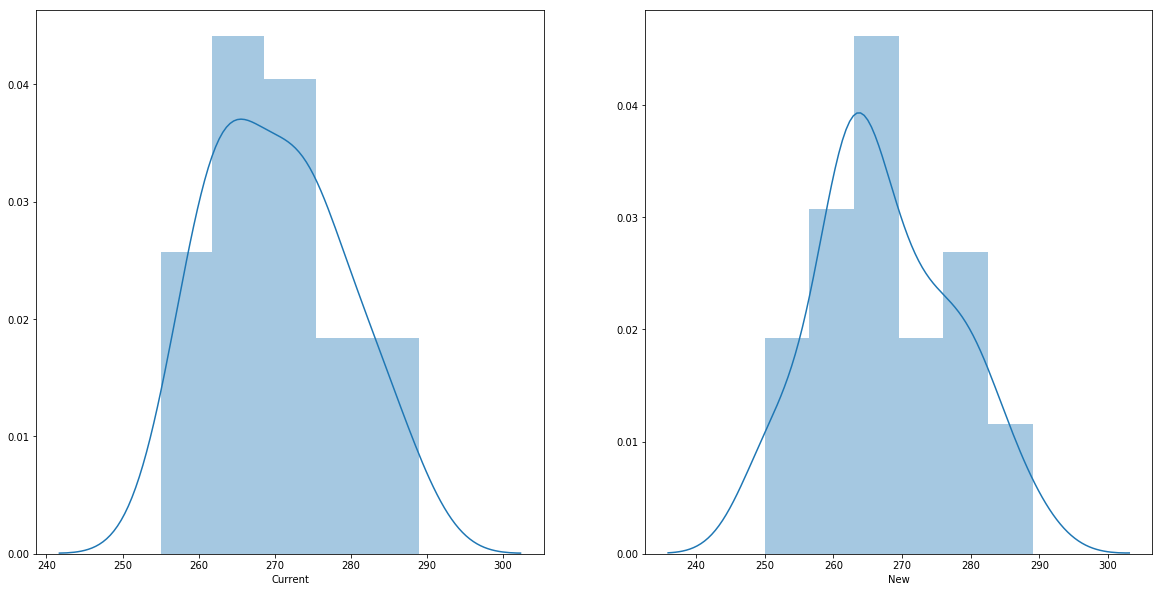

In [51]:
fig, ax =plt.subplots(1,2,figsize=(20, 10))

sns.distplot(current, ax=ax[0])
sns.distplot(new, ax=ax[1])

### Mannwhitneyu Test for non-parametric samples

To further authenticate our inference, we will assume the data is non-parametric in nature and do the Mannwhitneyu test on the two samples.

In [52]:
u,p_value = mannwhitneyu(current,new)

print(u,p_value)

668.0 0.10265192122893124


### Mannwhitneyu test inference

The p value is again more than .05 making us come to a conclusion that we will accept out null hypothesis and reject the alternate hypothesis. 


### Levene's test for homogenity of variance
We will further check the homegenity of the variance of the two samples. This can be done with Levene's test. The null hypothesis in this case is that the variance of two samples are the same and the alternative hypothesis is that the variance of the two samples is not the same. 


In [53]:
levene(current,new)

LeveneResult(statistic=0.2553238291765741, pvalue=0.6147759523331309)

### Levene's test inference
The pvalue is again higher than .05. So we will accept the null hypothesis that the variance of the two, are the same. 

### Test of power
Let us check the power of significance, based on our conclusion to see if there are any chances of errors.

In [54]:
effect = (m1 - m2)/(np.sqrt(((sd1**2)+(sd2**2))/2))
print(effect)

0.30081466507751725


The effect size is between .2 and .5 which is indicative that our conclusion about the mean of the two samples being comparable is likely to be correct for the population.


In [55]:
alpha = 0.05
power = 0.8

# perform power analysis
analysis = TTestIndPower()
result = analysis.solve_power(effect, power=power, nobs1=None, ratio=1.0, alpha=alpha)
test_power = analysis.power(effect_size=effect,nobs1=40,alpha=0.5,ratio=1,df=78,alternative="two-sided")

print('Sample Size: %.3f' % result)
print(test_power)

Sample Size: 174.441
0.7700018658160013


### Test of power inference
From the test of power it is evident that there is 77% chance of the null hypothesis being false. 

But over sample size is only 40 of each kind. Inorder to conclude we need to conduct the test on bigger sample of size 175 to reach on a conclusion.


## Conclusion:
The t test result for independent samples and the Mannwhitneyu test indicates that the driving range of the current and new golf balls are comparable. But the power of test indicates that there is a 77% chance of this hypothesis being false. We can come to conlusion only after the test is conducted on a bigger sample size of 175 and above. 